In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
#reading in all catalogs

photomcat = fits.getdata('primercosmos_photom_v0.2.fits.gz')
photzcat = fits.getdata('primercosmos_photz_quantities_v0.2.fits')
sampcat = pd.read_csv('Sample.EROs.PRIMER-COS.cat', delim_whitespace=True, names = ["ID", "RA", "Dec", "ZA", "flag"], skiprows = 1)

In [15]:
sampcat.shape

(154, 5)

In [3]:
#column names
print(photomcat.columns)
print(photzcat.columns)
print(sampcat.columns)

ColDefs(
    name = 'ID'; format = 'J'
    name = 'COORDID'; format = '20A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'X'; format = 'E'
    name = 'Y'; format = 'E'
    name = 'KRON_RADIUS'; format = 'E'
    name = 'A_IMAGE'; format = 'E'
    name = 'B_IMAGE'; format = 'E'
    name = 'THETA_IMAGE'; format = 'E'
    name = 'APCORR'; format = 'D'
    name = 'APCORR_APER'; format = '12D'
    name = 'APCORR_WINGS'; format = 'D'
    name = 'STELLARITY'; format = 'E'
    name = 'ISOAREA_IMAGE'; format = 'E'
    name = 'D_APER'; format = '12D'
    name = 'FLUX_F435W'; format = 'D'
    name = 'FLUXERR_F435W'; format = 'D'
    name = 'FLUX_APER_F435W'; format = '12D'
    name = 'FLUX_APER_NATIVE_F435W'; format = '12D'
    name = 'FLUXERR_APER_F435W'; format = '12D'
    name = 'FLUX_APERTOT_F435W'; format = '12D'
    name = 'FLUXERR_APERTOT_F435W'; format = '12D'
    name = 'RH_F435W'; format = 'E'
    name = 'FWHM_F435W'; format = 'E'
    name = 'FLUXERR_LOCAL_D0P2

In [4]:
#gray dots
#general use
zpt = 31.4

#fluxes
flux115 = photomcat['FLUX_F115W']
flux150 = photomcat['FLUX_F150W']
flux200 = photomcat['FLUX_F200W']
flux277 = photomcat['FLUX_F277W']
flux356 = photomcat['FLUX_F356W']
flux444 = photomcat['FLUX_F444W']

#flux errors
flux115err = photomcat['FLUXERR_F115W']
flux150err = photomcat['FLUXERR_F150W']
flux200err = photomcat['FLUXERR_F200W'] 
flux277err = photomcat['FLUXERR_F277W'] 
flux356err = photomcat['FLUXERR_F356W'] 
flux444err = photomcat['FLUXERR_F444W']

#f444 ratio
photomcat['D_APER'][0,:]
f444_04 = photomcat['FLUX_APER_F444W'][:,8]
f444_02 = photomcat['FLUX_APER_F444W'][:,5]
f444ratio = f444_04 / f444_02

#magnitudes
mag115 = -2.5 * np.log10(photomcat['FLUX_F115W']) + zpt
mag200 = -2.5 * np.log10(photomcat['FLUX_F200W']) + zpt
mag277 = -2.5 * np.log10(photomcat['FLUX_F277W']) + zpt
mag356 = -2.5 * np.log10(photomcat['FLUX_F356W']) + zpt
mag444 = -2.5 * np.log10(photomcat['FLUX_F444W']) + zpt

#signal to nosie
sn115 = photomcat['FLUX_F115W']/ photomcat['FLUXERR_F115W'] 
sn150 = photomcat['FLUX_F150W']/ photomcat['FLUXERR_F150W'] 
sn200 = photomcat['FLUX_F200W']/ photomcat['FLUXERR_F200W'] 
sn277 = photomcat['FLUX_F277W']/ photomcat['FLUXERR_F277W'] 
sn356 = photomcat['FLUX_F356W']/ photomcat['FLUXERR_F356W'] 
sn444 = photomcat['FLUX_F444W']/ photomcat['FLUXERR_F444W'] 

sn_thresh = 5
sig = (sn115 > sn_thresh) & (sn150 > sn_thresh) & (sn200 > sn_thresh) & \
        (sn277 > sn_thresh) & (sn356 > sn_thresh) & (sn444 > sn_thresh)

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/1772242038.py:28: RuntimeWarning: invalid value encountered in log10
  mag115 = -2.5 * np.log10(photomcat['FLUX_F115W']) + zpt
/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/1772242038.py:29: RuntimeWarning: invalid value encountered in log10
  mag200 = -2.5 * np.log10(photomcat['FLUX_F200W']) + zpt
/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/1772242038.py:31: RuntimeWarning: invalid value encountered in log10
  mag356 = -2.5 * np.log10(photomcat['FLUX_F356W']) + zpt
/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/1772242038.py:32: RuntimeWarning: invalid value encountered in log10
  mag444 = -2.5 * np.log10(photomcat['FLUX_F444W']) + zpt


In [5]:
#matching id catalogs

photomra = photomcat['RA']
photomdec = photomcat['DEC']
sampra = sampcat['RA']
sampdec = sampcat['Dec']

photomcoords = SkyCoord(ra=photomra, dec=photomdec, unit=u.deg)
sampcoords = SkyCoord(ra=sampra, dec=sampdec, unit=u.deg)

idx, d2d, d3d = sampcoords.match_to_catalog_sky(photomcoords)

#plt.hist(d2d.to(u.arcsec).value)
#offset = 0.125

match = d2d < 0.125 * u.arcsec
idx_m = idx[match]

In [14]:
len(idx_m)

150

In [11]:
#matches with filters
matflux115 = flux115[idx_m]
matflux150 = flux150[idx_m]
matflux200 = flux200[idx_m]
matflux277 = flux277[idx_m]
matflux356 = flux356[idx_m]
matflux444 = flux444[idx_m]

matmag115 = -2.5 * np.log10(matflux115) + zpt
matmag200 = -2.5 * np.log10(matflux200) + zpt
matmag277 = -2.5 * np.log10(matflux277) + zpt
matmag356 = -2.5 * np.log10(matflux356) + zpt
matmag444 = -2.5 * np.log10(matflux444) + zpt

#matched f44 ratio
matf444_04 = f444_04[idx_m]
matf444_02 = f444_02[idx_m]
matf444ratio = matf444_04 / matf444_02

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/2815611605.py:9: RuntimeWarning: invalid value encountered in log10
  matmag115 = -2.5 * np.log10(matflux115) + zpt
/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_397/2815611605.py:13: RuntimeWarning: invalid value encountered in log10
  matmag444 = -2.5 * np.log10(matflux444) + zpt


In [12]:
#matching the s/n
matflux115err = flux115err[idx_m]
matflux150err = flux150err[idx_m]
matflux200err = flux200err[idx_m]
matflux277err = flux277err[idx_m]
matflux356err = flux356err[idx_m]
matflux444err = flux444err[idx_m]

msn115 = matflux115/matflux115err
msn150 = matflux150/matflux150err
msn200 = matflux200/matflux200err
msn277 = matflux277/matflux277err 
msn356 = matflux356/matflux356err 
msn444 = matflux444/matflux444err

msig = (msn115 > sn_thresh) & (msn150 > sn_thresh) & (msn200 > sn_thresh) & \
        (msn277 > sn_thresh) & (msn356 > sn_thresh) & (msn444 > sn_thresh)

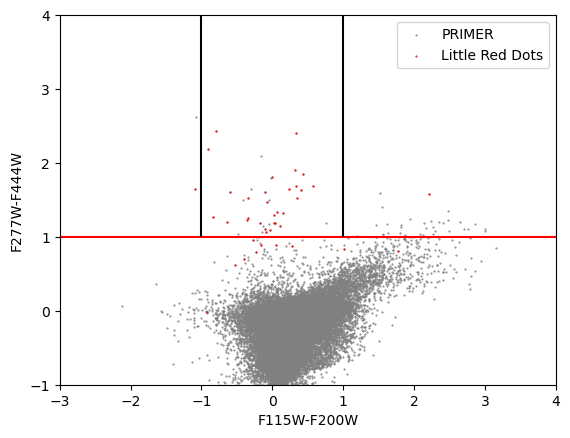

In [8]:
#graph 1

plt.scatter(mag115[sig]-mag200[sig], mag277[sig]-mag444[sig], color='gray', s=0.25, label='PRIMER')
plt.scatter(matmag115[msig]-matmag200[msig], matmag277[msig]-matmag444[msig], color='red', s=0.25, label='Little Red Dots')

plt.axhline(y = 1, color = 'red', linestyle = '-') 
plt.vlines(-1, 1, 5, linestyle='-', color='black')
plt.vlines(1, 1, 5, linestyle='-', color='black')
plt.xlabel('F115W-F200W')
plt.ylabel('F277W-F444W')
plt.xlim(-3, 4)
plt.ylim(-1, 4)
plt.legend()

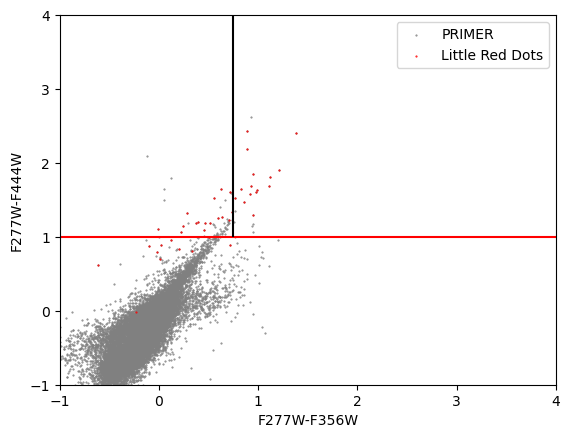

In [9]:
#graph 2
plt.scatter(mag277[sig]-mag356[sig], mag277[sig]-mag444[sig], color='gray', s=0.25, label='PRIMER')
plt.scatter(matmag277[msig]-matmag356[msig], matmag277[msig]-matmag444[msig], color='red', s=0.25, label='Little Red Dots')

plt.axhline(y = 1, color = 'r', linestyle = '-') 
plt.vlines(.75, 1, 5, linestyle='-', color='black')
plt.xlim(-1 ,4)
plt.ylim(-1, 4)
plt.xlabel('F277W-F356W')
plt.ylabel('F277W-F444W')
plt.legend()

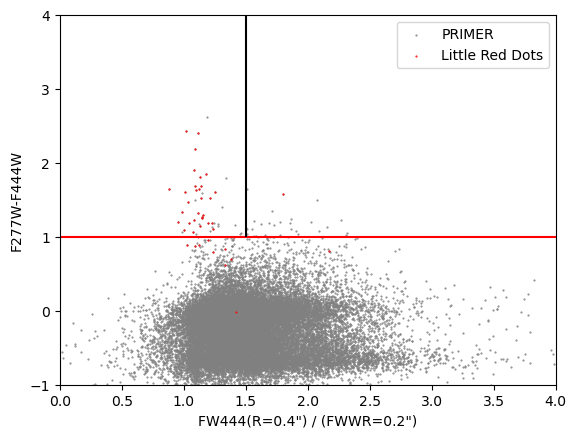

In [10]:
#graph 3

plt.scatter(f444ratio[sig], mag277[sig]-mag444[sig], color='gray', s=0.25, label='PRIMER') 
plt.scatter(matf444ratio[msig], matmag277[msig]-matmag444[msig], color='red', s=0.25, label='Little Red Dots')

plt.axhline(y = 1, color = 'r', linestyle = '-') 
plt.vlines(1.5, 1, 6, linestyle='-', color='black')
plt.xlim(0, 4)
plt.ylim(-1,4)
plt.xlabel('FW444(R=0.4") / (FWWR=0.2")')
plt.ylabel('F277W-F444W')
plt.legend()

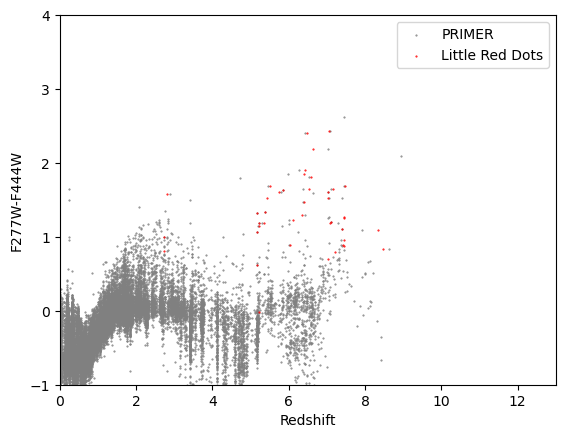

In [18]:
#graph 4

zphotz = photzcat['ZA']
zsamp = sampcat['ZA']

plt.scatter(zphotz[sig], mag277[sig]-mag444[sig], color='gray', s=0.25, label='PRIMER')
plt.scatter(zsamp[match][msig], matmag277[msig]-matmag444[msig], color='red', s=0.25, label='Little Red Dots')

plt.xlabel('Redshift')
plt.ylabel('F277W-F444W')
plt.xlim(0, 13)
plt.ylim(-1,4)
plt.legend()

In [ ]:
print(len(zsamp))
print(len(matmag277-matmag444))

print(len(matmag277[msig]-matmag444[msig]))
print(len(zsamp[msig]))